In [67]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Brief Information
We have a CSV file named Anime_List_2024.csv, which contains the top animes of 2024. The goal of this project is to conduct Exploratory Data Analysis (EDA). We will first examine the data and then proceed step by step to the next stages of the project.
For initial step, we will start with the following.
- Load the Data
- Inspect the Data
- Clean the Data

In [68]:
# Load the Data from Anime_List_2024.csv
data = pd.read_csv("Anime_List_2024.csv")

In [69]:
# Inspect the Data
data.shape

(1000, 23)

We have got 1000 rows of data and 23 columns.

In [70]:
# Let's check the columns and their data types in the DataFrame.
data.dtypes

Unnamed: 0       int64
Score          float64
Popularity       int64
Rank             int64
Members          int64
Description     object
Synonyms        object
Japanese        object
English         object
Type            object
Episodes        object
Status          object
Aired           object
Premiered       object
Broadcast       object
Producers       object
Licensors       object
Studios         object
Source          object
Genres          object
Demographic     object
Duration        object
Rating          object
dtype: object

The DataFrame consists of 23 columns with various data types. Most columns have object data type, which means they are stored as strings.
We might have to model the dataset in next steps. 
For more inspection of the data
- look at the actual data
- verify the data with it's type
- type conversion where necessary

In [71]:
# Display the first few rows again to inspect the data

data.head()

,Unnamed: 0,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,...,Fall 2023,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
1,1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,...,Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
2,2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,...,Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",NaN,24 min. per ep.,PG-13 - Teens 13 or older
3,3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,...,Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
4,4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,...,Spring 2019,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)


## Clean and Transform the Data
Our data has got alot of columns in strings which could be converted to int after removing string leading or trailing with it.
Initial approach to cleaning our data 
- remove unnecessary rows or columns
- rename the columns to a proper heading
- remove any whitespaces
- remove leading trailing strings to convert the column to integer


In [72]:
# let's remove descriptions,synonyms,japanese,producers from the dataframe
# first let's create a copy of our dataframe
data_first = data.copy()
data_first.drop(columns=['Description', 'Synonyms', 'Japanese', 'Producers'], inplace=True)
data_first.head()

,Unnamed: 0,Score,Popularity,Rank,Members,English,Type,Episodes,Status,Aired,Premiered,Broadcast,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,0,9.38,284,1,710,Frieren: Beyond Journey's End,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,Fridays at 23:00 (JST),"None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
1,1,9.09,3,2,3,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
2,2,9.07,13,3,2,Steins;Gate,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",NaN,24 min. per ep.,PG-13 - Teens 13 or older
3,3,9.06,342,4,630,Gintama Season 4,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
4,4,9.05,21,5,2,Attack on Titan Season 3 Part 2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,Mondays at 00:10 (JST),Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)


In [73]:
# Rename the "Unnamed" column to "ID"
data_first.rename(columns={'Unnamed: 0':'Id','English':'Name'},inplace=True)
data_first.columns

Index(['Id', 'Score', 'Popularity', 'Rank', 'Members', 'Name', 'Type',
       'Episodes', 'Status', 'Aired', 'Premiered', 'Broadcast', 'Licensors',
       'Studios', 'Source', 'Genres', 'Demographic', 'Duration', 'Rating'],
      dtype='object')

In [74]:
# Remove leading and trailing whitespaces from column names
data_first.columns = data_first.columns.str.strip()

In [75]:
#we now will extract the numeric value from the "Duration" column and rename it to "Duration per ep". 
# Also we will change the datatype to int for the column
# Extract the numeric value from the "Duration" column
data_first['Duration_per_ep'] = data_first['Duration'].str.extract(r'(\d+)')
data_first['Duration_per_ep'] = pd.to_numeric(data_first['Duration_per_ep'], errors='coerce')  # Convert to numeric
data_first.drop(columns=['Duration'],inplace=True)

data_first.dtypes


Id                   int64
Score              float64
Popularity           int64
Rank                 int64
Members              int64
Name                object
Type                object
Episodes            object
Status              object
Aired               object
Premiered           object
Broadcast           object
Licensors           object
Studios             object
Source              object
Genres              object
Demographic         object
Rating              object
Duration_per_ep      int64
dtype: object

In [76]:
# Check for values in the DataFrame
data_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1000 non-null   int64  
 1   Score            1000 non-null   float64
 2   Popularity       1000 non-null   int64  
 3   Rank             1000 non-null   int64  
 4   Members          1000 non-null   int64  
 5   Name             859 non-null    object 
 6   Type             1000 non-null   object 
 7   Episodes         1000 non-null   object 
 8   Status           1000 non-null   object 
 9   Aired            1000 non-null   object 
 10  Premiered        569 non-null    object 
 11  Broadcast        569 non-null    object 
 12  Licensors        1000 non-null   object 
 13  Studios          1000 non-null   object 
 14  Source           1000 non-null   object 
 15  Genres           771 non-null    object 
 16  Demographic      521 non-null    object 
 17  Rating         

In [77]:
# Define a function to split 'Aired' into 'Start_Date' and 'End_Date'
def split_aired_dates(aired):
    if ' to ' in aired:
        start_date, end_date = aired.split(' to ')
        if end_date == '?':
            end_date = np.nan
    else:
        start_date, end_date = aired, np.nan
    return pd.Series([start_date, end_date])

# Apply the function and create 'Start_Date' and 'End_Date' columns
data_first[['Start_Date', 'End_Date']] = data_first['Aired'].apply(split_aired_dates)

# Replace 'Unknown' with 'NA'
data_first = data_first.replace('Unknown', 'NA')

# Convert 'Start_Date' and 'End_Date' to datetime and format to month/day/year
data_first['Start_Date'] = pd.to_datetime(data_first['Start_Date'], errors='coerce').dt.strftime('%m/%d/%Y')
data_first['End_Date'] = pd.to_datetime(data_first['End_Date'], errors='coerce').dt.strftime('%m/%d/%Y')




In [78]:
# Define a function to split premiered into year and season
def split_premiered(premiered):
    try:
        if isinstance(premiered, str) and premiered.strip():  # Check if 'Premiered' is a non-empty string
            season, year = premiered.split(' ')
            return pd.Series([year, season])
        else:
            return pd.Series(['NA', 'NA'])
    except ValueError:
        return pd.Series(['NA', 'NA'])
    # Apply the function and create 'Premiered_Year' and 'Premiered_Season' columns
data_first[['Premiered_Year', 'Premiered_Season']] = data_first['Premiered'].apply(split_premiered)

# Convert 'Premiered_Year' to datetime and format it to just the year
data_first['Premiered_Year'] = pd.to_datetime(data_first['Premiered_Year'], format='%Y', errors='coerce').dt.strftime('%Y')



In [79]:
# Function to split Broadcast into Broadcast_Day and Broadcast_Time
def split_broadcast(broadcast):
    if pd.isna(broadcast):  # Check for NaN values
        return pd.Series(['NA', 'NA'])
    elif ' at ' in broadcast:
        day, time = broadcast.split(' at ')
        if ' (JST)' in time:
            time = time.replace(' (JST)', '')
        return pd.Series([day, time])
    elif 'Unknown' in broadcast:
        return pd.Series(['NA', 'NA'])
    else:
        return pd.Series(['NA', 'NA'])

# Apply the function and create 'Broadcast_Day' and 'Broadcast_Time (JST)' columns
data_first[['Broadcast_Day', 'Broadcast_Time (JST)']] = data_first['Broadcast'].apply(split_broadcast)

# Convert 'Broadcast_Time (JST)' to time type
data_first['Broadcast_Time (JST)'] = pd.to_datetime(data_first['Broadcast_Time (JST)'], format='%H:%M', errors='coerce').dt.time


In [80]:
# drop all expanded columns
data_first.drop(columns=['Broadcast','Premiered','Aired'], inplace=True)
data_first.head()

,Id,Score,Popularity,Rank,Members,Name,Type,Episodes,Status,Licensors,...,Genres,Demographic,Rating,Duration_per_ep,Start_Date,End_Date,Premiered_Year,Premiered_Season,Broadcast_Day,Broadcast_Time (JST)
0,0,9.38,284,1,710,Frieren: Beyond Journey's End,TV,28,Finished Airing,"None found, add some",...,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,PG-13 - Teens 13 or older,24,09/29/2023,03/22/2024,2023,Fall,Fridays,23:00:00
1,1,9.09,3,2,3,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"Funimation, Aniplex of America",...,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,R - 17+ (violence & profanity),24,04/05/2009,07/04/2010,2009,Spring,Sundays,17:00:00
2,2,9.07,13,3,2,Steins;Gate,TV,24,Finished Airing,Funimation,...,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",NaN,PG-13 - Teens 13 or older,24,04/06/2011,09/14/2011,2011,Spring,Wednesdays,02:05:00
3,3,9.06,342,4,630,Gintama Season 4,TV,51,Finished Airing,"Funimation, Crunchyroll",...,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,PG-13 - Teens 13 or older,24,04/08/2015,03/30/2016,2015,Spring,Wednesdays,18:00:00
4,4,9.05,21,5,2,Attack on Titan Season 3 Part 2,TV,10,Finished Airing,Funimation,...,"ActionAction, DramaDrama, SuspenseSuspense",ShounenShounen,R - 17+ (violence & profanity),23,04/29/2019,07/01/2019,2019,Spring,Mondays,00:10:00


In [81]:
# Convert 'Start_Date' and 'End_Date' to date format
data_first['Start_Date'] = pd.to_datetime(data_first['Start_Date'], errors='coerce').dt.date
data_first['End_Date'] = pd.to_datetime(data_first['End_Date'], errors='coerce').dt.date


In [82]:
# Fill NA in all null values in string columns
data_first.fillna('NA', inplace=True)
data_first.info()

# Keep only one set of genre name 
def split_and_keep_one(genre_string):
    # Split by commas and flatten the resulting list of lists
    genres = [genre.strip() for part in genre_string.split(',') for genre in part.split()]
    # Split each word into two identical parts and keep only the first part
    unique_genres = []
    for genre in genres:
        half_length = len(genre) // 2
        first_part = genre[:half_length]
        unique_genres.append(first_part)
    return unique_genres

# Apply the function to split combined genres and keep only one occurrence of each genre
data_first['Genres'] = data_first['Genres'].apply(split_and_keep_one)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1000 non-null   int64  
 1   Score                 1000 non-null   float64
 2   Popularity            1000 non-null   int64  
 3   Rank                  1000 non-null   int64  
 4   Members               1000 non-null   int64  
 5   Name                  1000 non-null   object 
 6   Type                  1000 non-null   object 
 7   Episodes              1000 non-null   object 
 8   Status                1000 non-null   object 
 9   Licensors             1000 non-null   object 
 10  Studios               1000 non-null   object 
 11  Source                1000 non-null   object 
 12  Genres                1000 non-null   object 
 13  Demographic           1000 non-null   object 
 14  Rating                1000 non-null   object 
 15  Duration_per_ep       

In [83]:
# Create a copy of Cleaned Dataset
data_cleaned = data_first.copy()


data_cleaned.head()

,Id,Score,Popularity,Rank,Members,Name,Type,Episodes,Status,Licensors,...,Genres,Demographic,Rating,Duration_per_ep,Start_Date,End_Date,Premiered_Year,Premiered_Season,Broadcast_Day,Broadcast_Time (JST)
0,0,9.38,284,1,710,Frieren: Beyond Journey's End,TV,28,Finished Airing,"None found, add some",...,"[Adventure, Drama, Fantasy]",ShounenShounen,PG-13 - Teens 13 or older,24,2023-09-29,2024-03-22,2023,Fall,Fridays,23:00:00
1,1,9.09,3,2,3,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"Funimation, Aniplex of America",...,"[Action, Adventure, Drama, Fantasy]",ShounenShounen,R - 17+ (violence & profanity),24,2009-04-05,2010-07-04,2009,Spring,Sundays,17:00:00
2,2,9.07,13,3,2,Steins;Gate,TV,24,Finished Airing,Funimation,...,"[Drama, Sci-Fi, Suspense]",NA,PG-13 - Teens 13 or older,24,2011-04-06,2011-09-14,2011,Spring,Wednesdays,02:05:00
3,3,9.06,342,4,630,Gintama Season 4,TV,51,Finished Airing,"Funimation, Crunchyroll",...,"[Action, Comedy, Sci-Fi]",ShounenShounen,PG-13 - Teens 13 or older,24,2015-04-08,2016-03-30,2015,Spring,Wednesdays,18:00:00
4,4,9.05,21,5,2,Attack on Titan Season 3 Part 2,TV,10,Finished Airing,Funimation,...,"[Action, Drama, Suspense]",ShounenShounen,R - 17+ (violence & profanity),23,2019-04-29,2019-07-01,2019,Spring,Mondays,00:10:00


## Data Cleaning Summary
The initial dataset contained 23 columns with various types and a mixture of complete and incomplete data.
 - Column Removal: Removed unnecessary columns like 'Description', 'Synonyms', 'Japanese', 'Producers' to streamline the dataset.
 - Column Renaming: Renamed columns for clarity (e.g., 'Unnamed: 0' to 'Id', 'English' to 'Name').
 - Whitespace Removal: Ensured no extra whitespaces in column names or values.
 - Duration Conversion: Transformed the 'Duration' column from string format (e.g., '24 min. per ep.') to an integer representing the      duration in minutes, and renamed it to 'Duration_per_ep'.
 - Handling Null Values: Replaced null values in all string columns with 'NA' to maintain consistency.
 - Date Splitting and Conversion:
    Split the 'Aired' column into 'Start_Date' and 'End_Date', converted them to date format.
    Split the 'Premiered' column into 'Premiered_Year' and 'Premiered_Season'.
    Split the 'Broadcast' column into 'Broadcast_Day' and 'Broadcast_Time (JST)', and converted 'Broadcast_Time (JST)' to time format.
The cleaned and transformed dataset now has 22 columns, all with complete data. Each column is appropriately typed and ready for analysis.


## EDA, Statistical Analysis, Data Visualisations and Reporting
Now that the data has been prepared and cleaned, we can proceed with various types of analyses of the project. Here are some potential next steps we would perform:
- Exploratory Data Analysis (EDA)
- Data Visualisation
- Statistical Analysis
- Data Reporting


# Business Questions could be 
* How does the number of members (popularity) correlate with the score and rank of an anime?
* Are there specific genres  that are more likely to achieve higher ratings or popularity?
* Does the broadcast time and day affect the success metrics of an anime?
* Is there a trend between the type of anime (e.g., TV series, movie) and its success metrics?

For now, let's work out through this business questions one by one

In [84]:
# How does the number of members (popularity) correlate with the score and rank of an anime?
# let's display top 10 anime based on popularity for a start
top_10_animes_by_popularity= data_cleaned.nlargest(10,'Popularity')

print(top_10_animes_by_popularity[['Name', 'Score','Popularity' ,'Type', 'Episodes', 'Source']])


                                               Name  Score  Popularity   Type  \
751                                              NA   7.92       12043    ONA   
669  Genshin Impact: The Song Burning in the Embers   7.97       11638    ONA   
244                       Swallowed Star 3rd Season   8.32       11443    ONA   
518                                The Demon Hunter   8.08       11337    ONA   
351                       Swallowed Star 4th Season   8.22       11250    ONA   
363                                              NA   8.21       10295  Movie   
639             Soul Land 2: The Peerless Tang Clan   8.00        9980    ONA   
979                                              NA   7.81        9837  Movie   
579                       Throne of Seal 2nd Season   8.04        9404    ONA   
773                                              NA   7.91        8953  Movie   

    Episodes     Source  
751        1   Original  
669        1       Game  
244       33      Novel  
518 

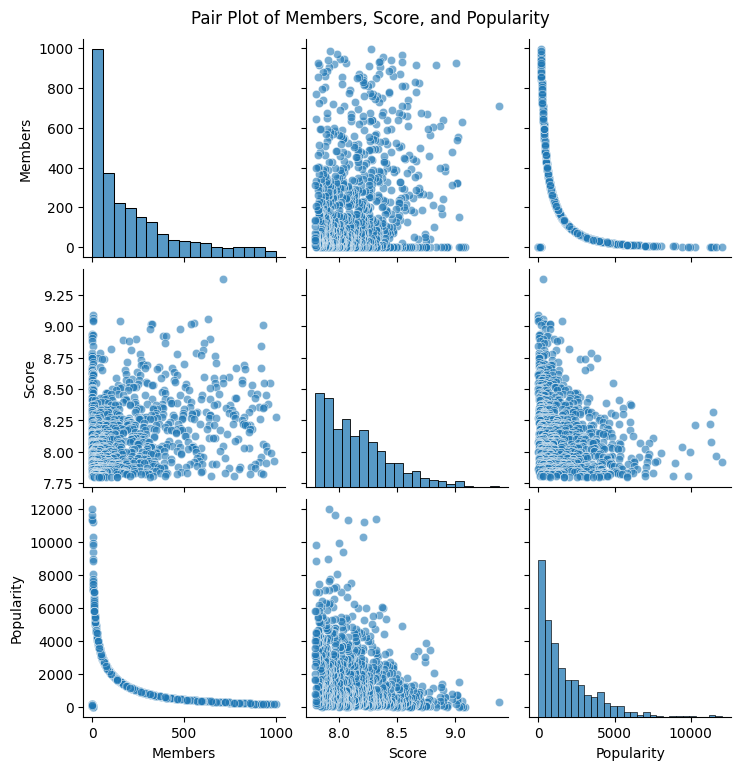

In [85]:
# while some animes might be highly popular, they may not necessarily have the highest ratings based on scores.

# Pair plot to see all relationships at once
sns.pairplot(data_cleaned, vars=['Members', 'Score', 'Popularity'], kind='scatter', plot_kws={'alpha':0.6})
plt.suptitle('Pair Plot of Members, Score, and Popularity', y=1.02)
plt.show()


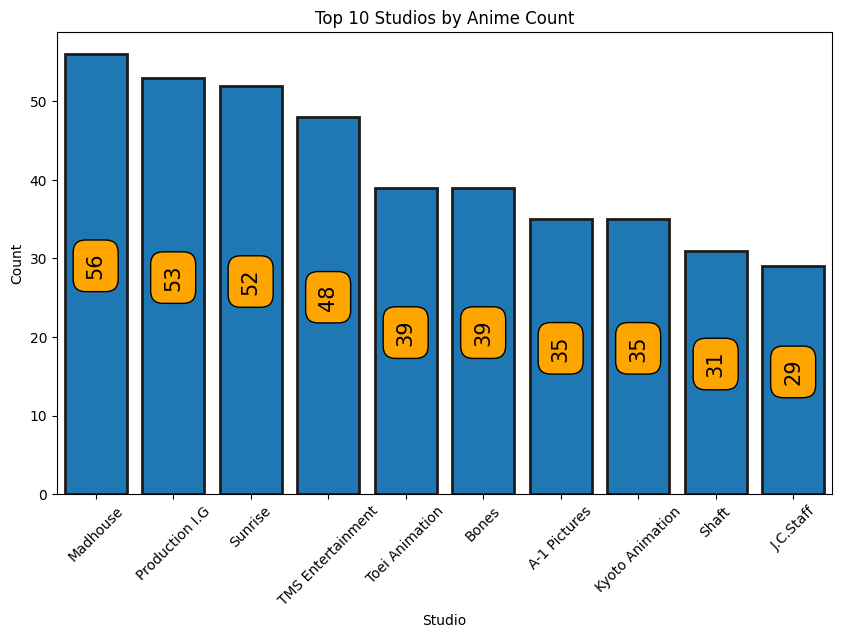

In [86]:
# Top 10 Studios by Anime Count
studio_counts = data_cleaned['Studios'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))

p = sns.barplot(x=studio_counts.index,y=studio_counts.values, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
#sns.barplot(x=studio_counts.index, y=studio_counts.values)
plt.title('Top 10 Studios by Anime Count')
plt.xlabel('Studio')
plt.ylabel('Count')
plt.xticks(rotation=45)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

plt.show()

As the members increase, the popularity decreases, but the score seems similarly increasing. That's really interesting .
Also let's see the correlation between these three.

In [87]:
data_cleaned[['Popularity', 'Score', 'Members']].corr().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,Popularity,Score,Members
Popularity,1.000000,-0.321772,-0.507009
Score,-0.321772,1.000000,0.180080
Members,-0.507009,0.180080,1.000000


The correlation matrix reveals a negative correlation between 'Score' and 'Popularity' (-0.32), a stronger negative correlation between 'Popularity' and 'Members' (-0.51), and a weak positive correlation between 'Score' and 'Members' (0.18).

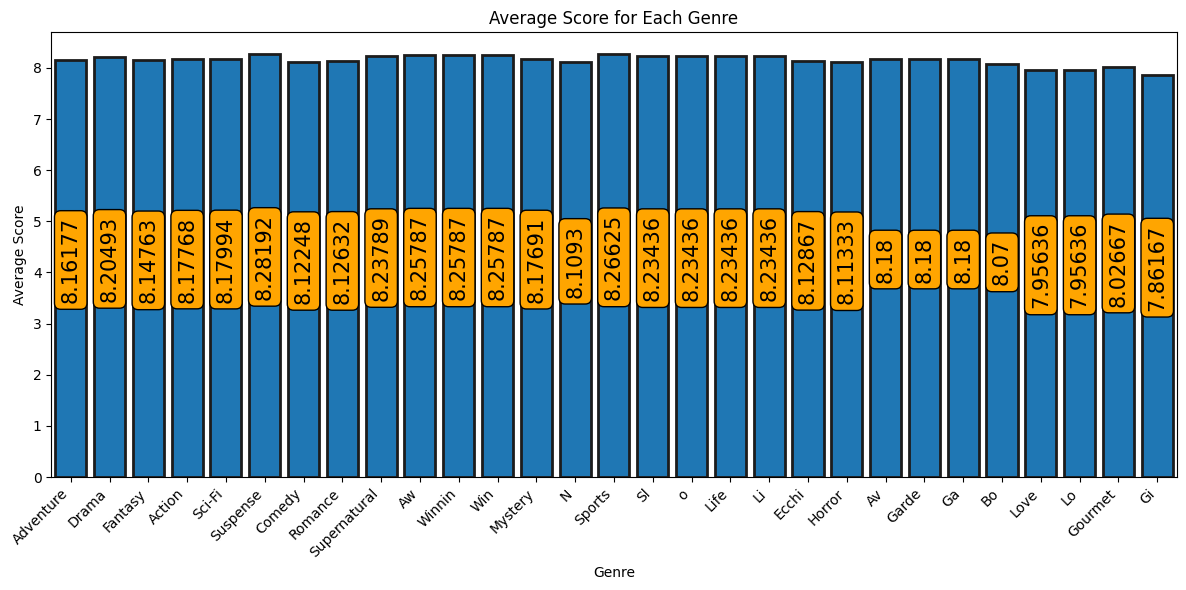

In [88]:
# Function to split combined genres into individual genres and calculate average score for each genre
def calculate_average_score_per_genre(data):
    genre_scores = {}
    for index, row in data.iterrows():
        genres = row['Genres']
        for genre in genres:
            if genre not in genre_scores:
                genre_scores[genre] = {'Total_Score': 0, 'Count': 0}
            genre_scores[genre]['Total_Score'] += row['Score']
            genre_scores[genre]['Count'] += 1
    
    for genre, stats in genre_scores.items():
        genre_scores[genre]['Average_Score'] = stats['Total_Score'] / stats['Count']
    
    return genre_scores

# Calculate average score per genre
genre_scores = calculate_average_score_per_genre(data_cleaned)

# Extract genre names and average scores for plotting
genres = list(genre_scores.keys())
average_scores = [genre_scores[genre]['Average_Score'] for genre in genres]

# Plot bar chart
plt.figure(figsize=(12, 6))
p = sns.barplot(x=genres,y=average_scores, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)

for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.3, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

#plt.bar(genres, average_scores, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.title('Average Score for Each Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




All the genres have similar average score around 8.

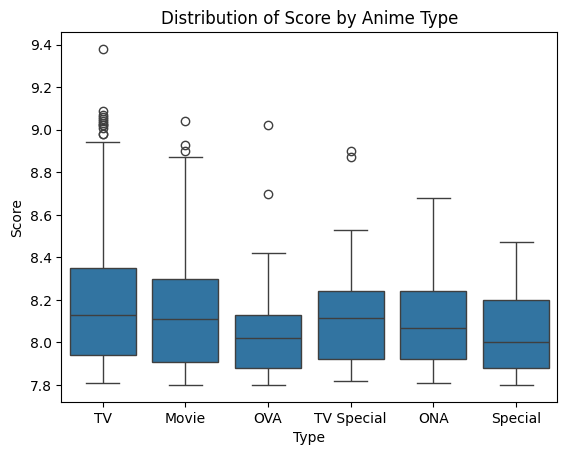

In [89]:

# EDA: Visualize the distribution of success metrics across different types of anime
sns.boxplot(x='Type', y='Score', data=data_cleaned)
plt.title('Distribution of Score by Anime Type')
plt.show()



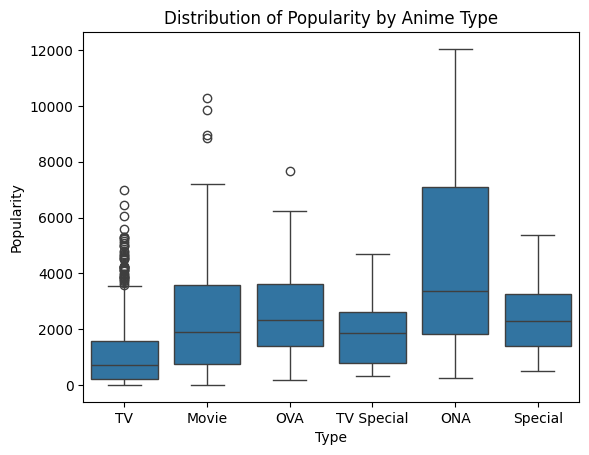

In [90]:
sns.boxplot(x='Type', y='Popularity', data=data_cleaned)
plt.title('Distribution of Popularity by Anime Type')
plt.show()


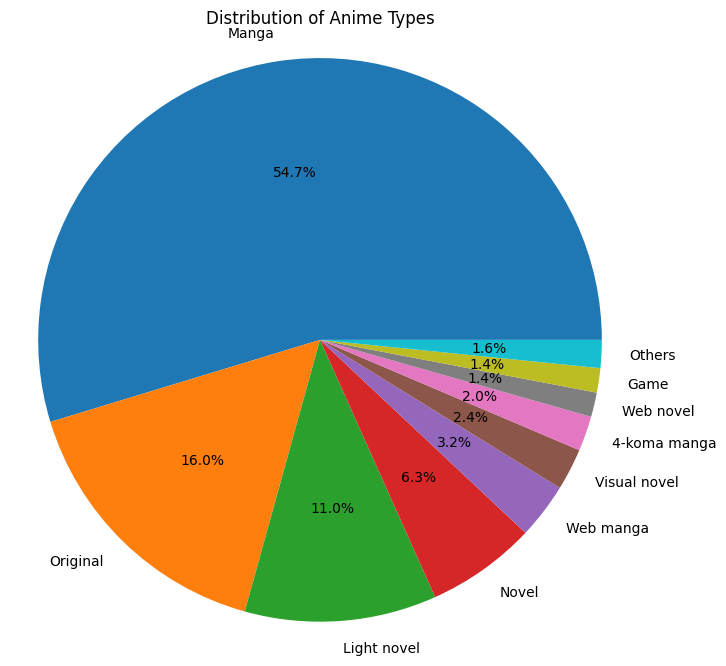

In [91]:
# Distribution by Anime Types
source_counts = data_cleaned['Source'].value_counts(normalize=True)
others = source_counts[source_counts < 0.01].sum()
source_counts = source_counts[source_counts >= 0.01]
source_counts = pd.concat([source_counts, pd.Series({'Others': others})])

plt.figure(figsize=(8, 8))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Anime Types')
plt.axis('equal')
plt.show()